# Function to Plot Forecasts

In [1]:
# Please make sure PlotForecast.py is in same directory
from PlotForecast import plot_forecast

**Overview.**
1. **First plot** is all observed, predicted values.
2. **Second plot** is subset of above. By default, will show prior 5 years. 
<br>- You can set "start_date", "end_date" (e.g., start_date='2015' or start_date='2014-04-17'). <br>- If format not in "%Y-%m-%d", need to specify "date_format"
1. **Third (lower left) plot** shows residuals (non-standardized).
1. **Fouth (lower right) plot** shows autocorrelation of resids.

**Function requires datetime index.**
<br>
1. You can set datetime index using "data_index_col" (same as "index_col" in pandas.read_csv).
1. If "data_path" and "data" are both provided, will use "data".

**Function requires column names for "y", "yhat" (optional for "ci_lower", "ci_upper").**
1. Column index will not work.

**Exceptions/errors are not handled very well.**
1. Sorry, was short on time.

*You can change line colors using y_color, yhat_color*

In [2]:
# Sample model output file
sample_path = './Final Short-term Model/Results/eight_month_prediction_EPS.csv'

## With pathname

* Dropping duplicate index values. Keeping last.

- from July 01, 2012 to March 01, 2021 -
mse: 0.0429
rmse: 0.2072


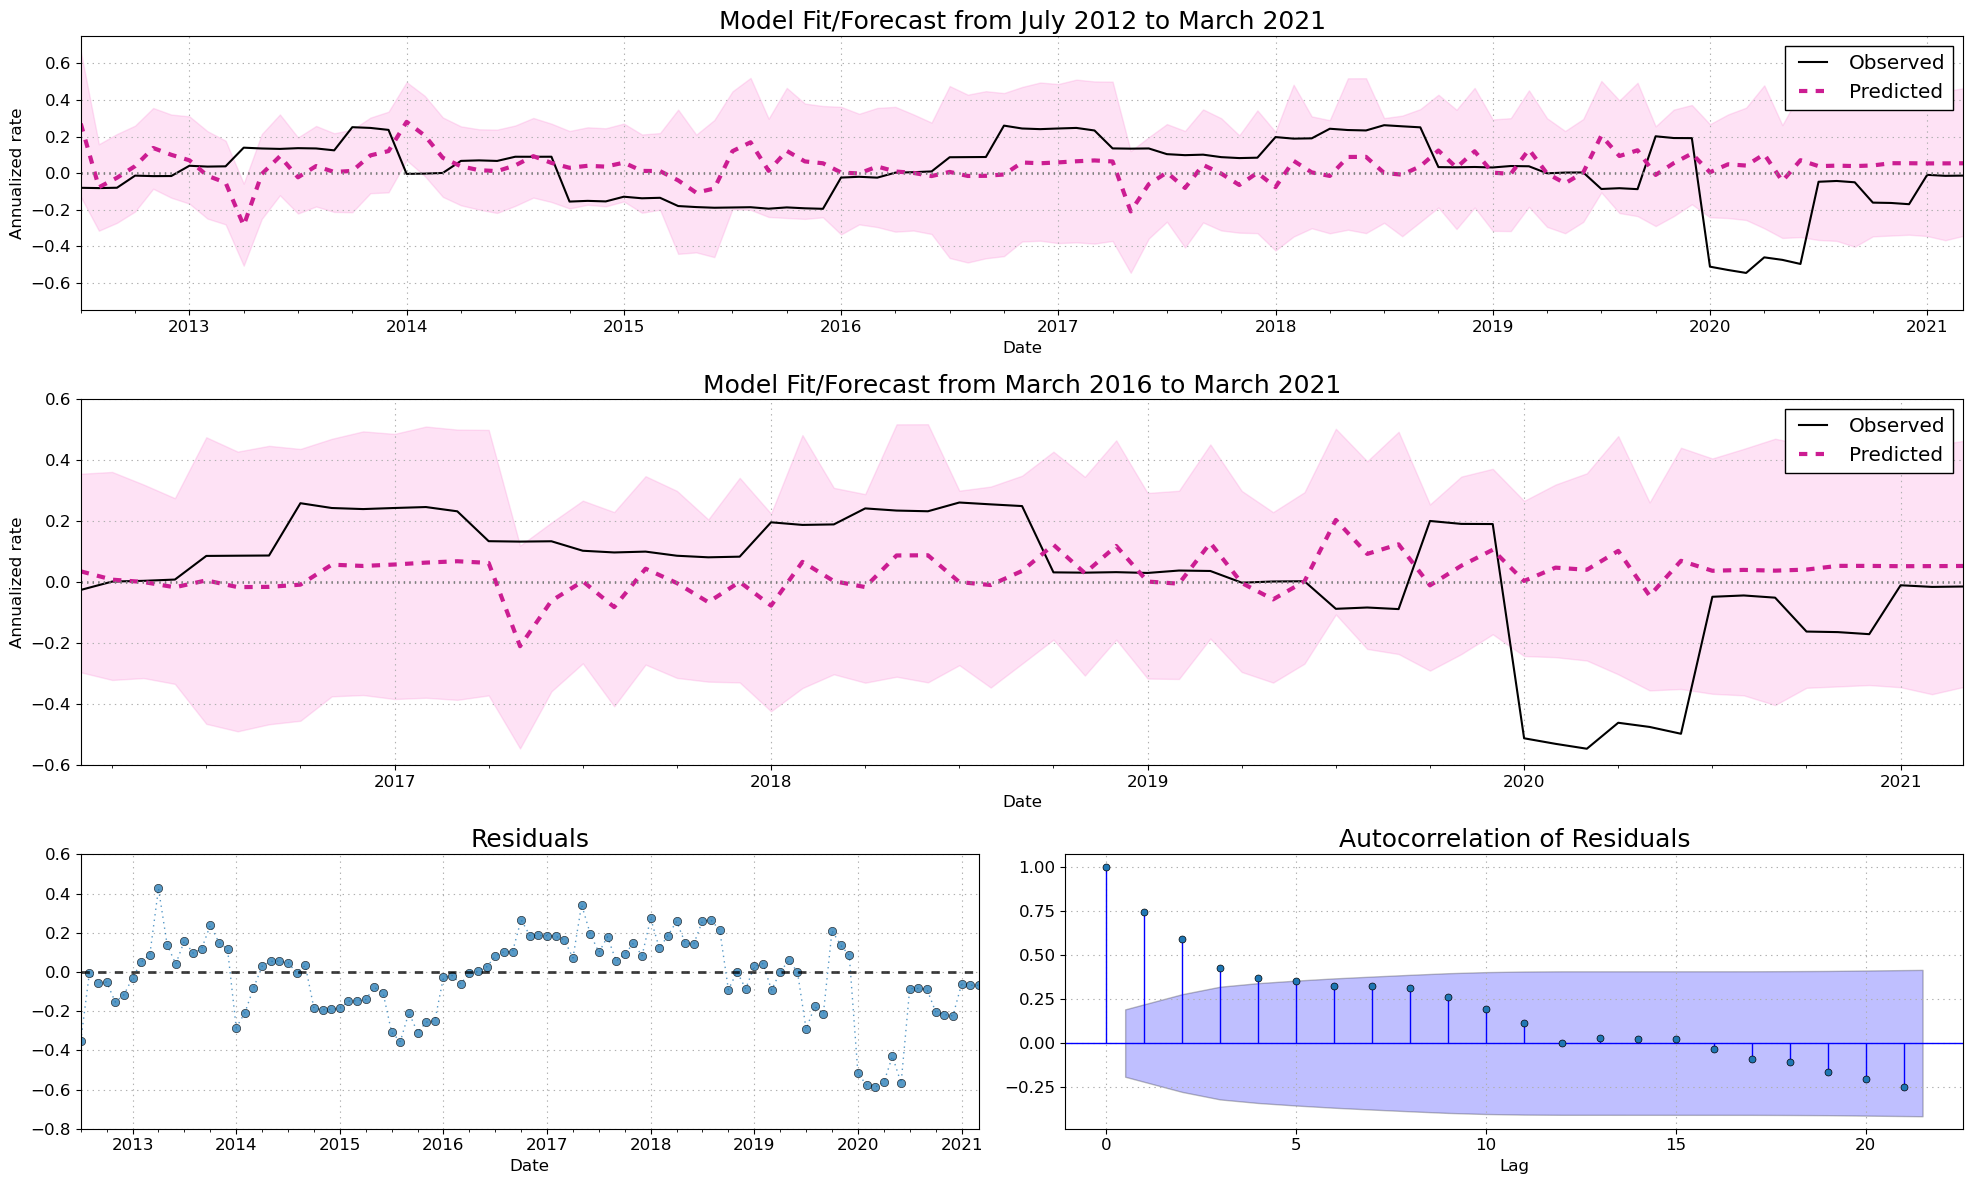

In [3]:
# Assuming you know column names for 'y', 'yhat', 'ci_lower', 'ci_upper'

f = plot_forecast(data_path=sample_path, data_index_col=0, # <-- col index or name to set as index
                  y='y', yhat='yhat', ci_lower='yhat_lower', ci_upper='yhat_upper')

## With DataFrame (index not set)

In [4]:
import pandas as pd

df = pd.read_csv(sample_path)
df.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-07-01,0.270705,-0.129114,0.665433,-0.080468,2012-06-15
1,2012-08-01,1.024590,0.636444,1.434697,-0.081968,2012-06-15
2,2012-09-01,-0.001701,-0.415503,0.411768,-0.080110,2012-06-15
3,2012-10-01,2.124345,1.700104,2.513674,-0.013894,2012-06-15
4,2012-11-01,1.626149,1.231327,2.061291,-0.016500,2012-06-15


* Dropping duplicate index values. Keeping last.



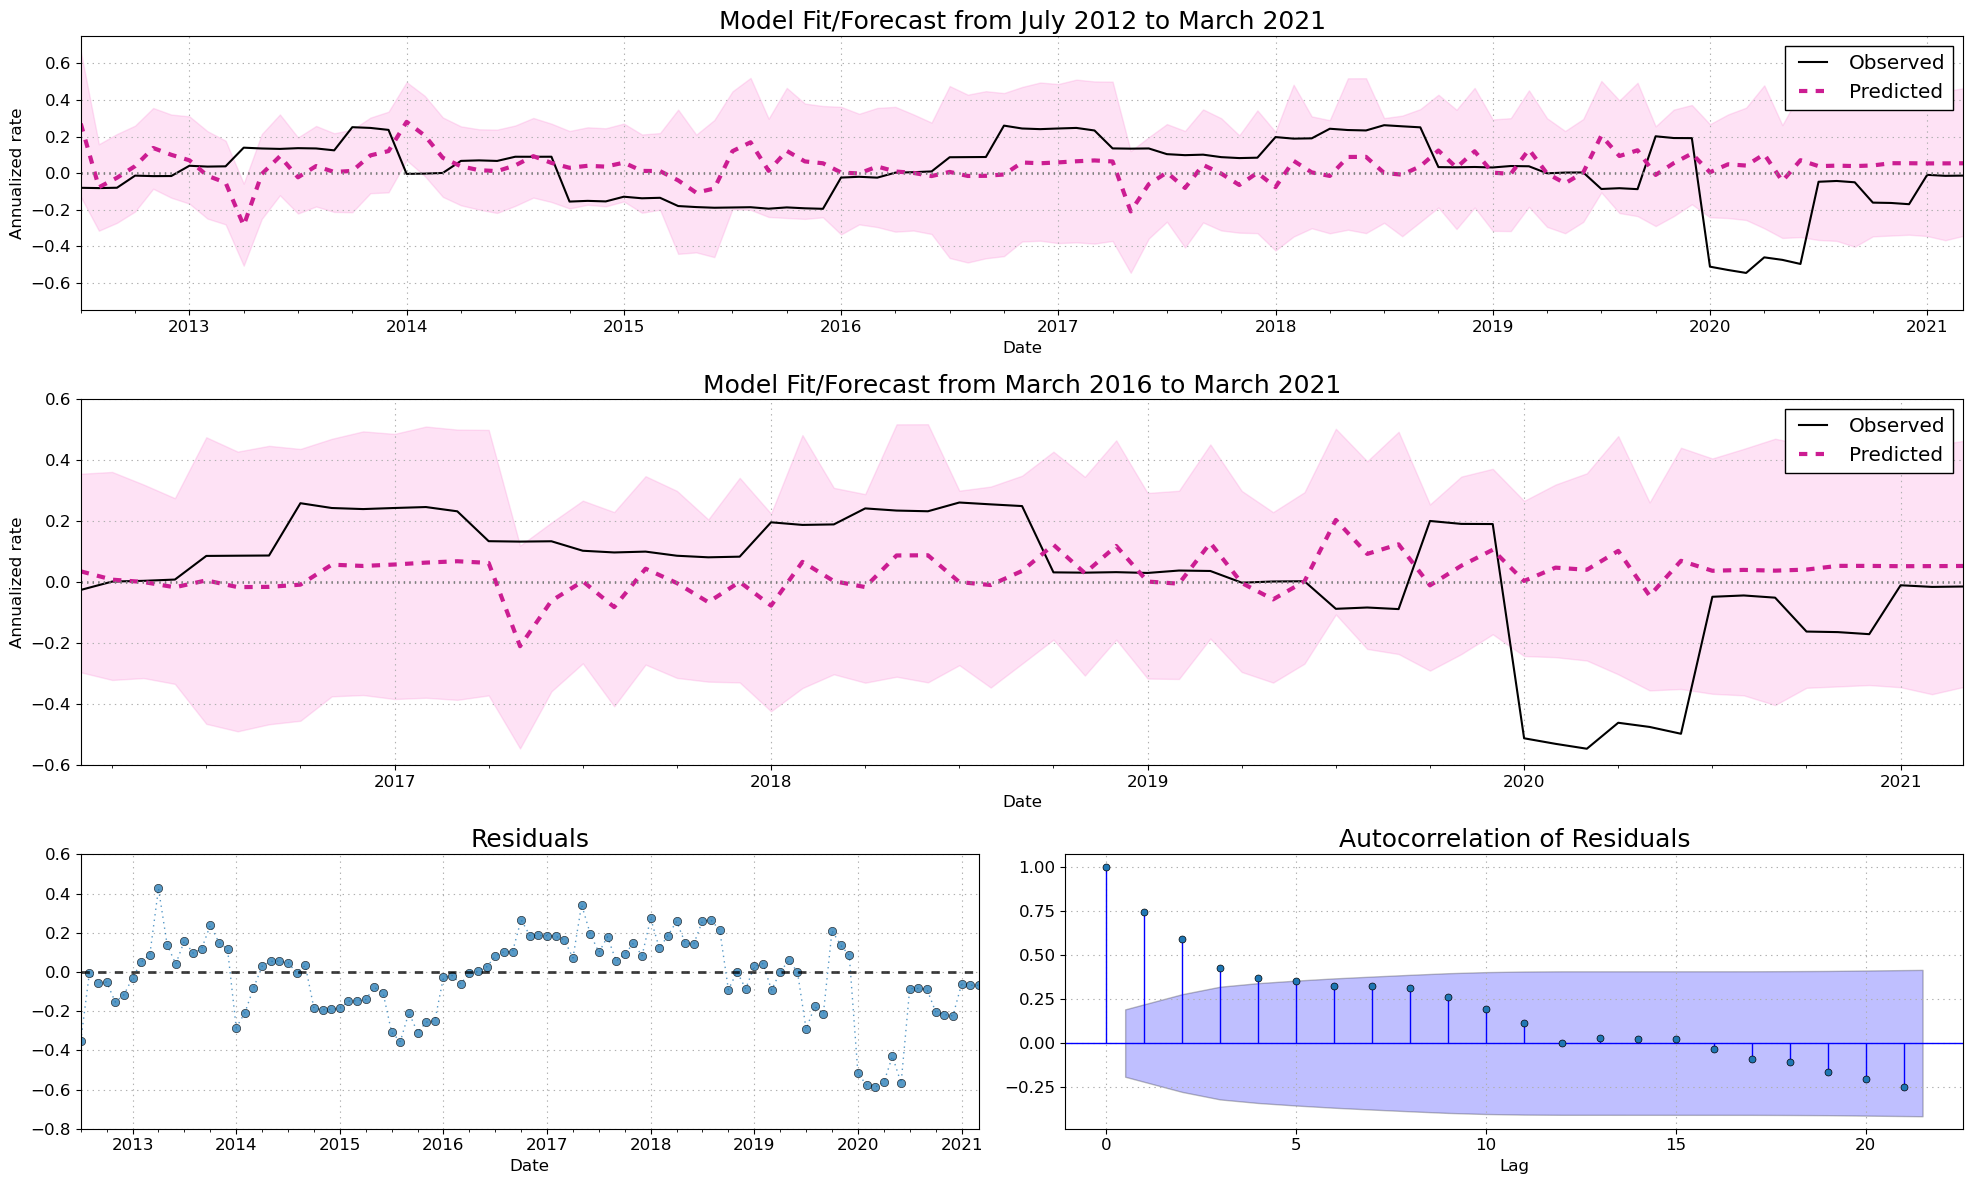

In [5]:
# Plot with dataframe
f = plot_forecast(data=df, data_index_col=0, # <-- col to set as index / can also be 'ds' or wtvr
                  y='y', yhat='yhat', ci_lower='yhat_lower', ci_upper='yhat_upper',
                  print_mse=False)

## With DataFrame (index set)

In [8]:
# Set index
df.set_index('ds', inplace=True)
df.index = pd.to_datetime(df.index)

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

* Index converted to datetime. Please verify example below.
from 2012-07-01 00:00:00 to 2012-07-01 00:00:00

* Dropping duplicate index values. Keeping last.

- from July 01, 2012 to March 01, 2021 -
mse: 0.0429
rmse: 0.2072


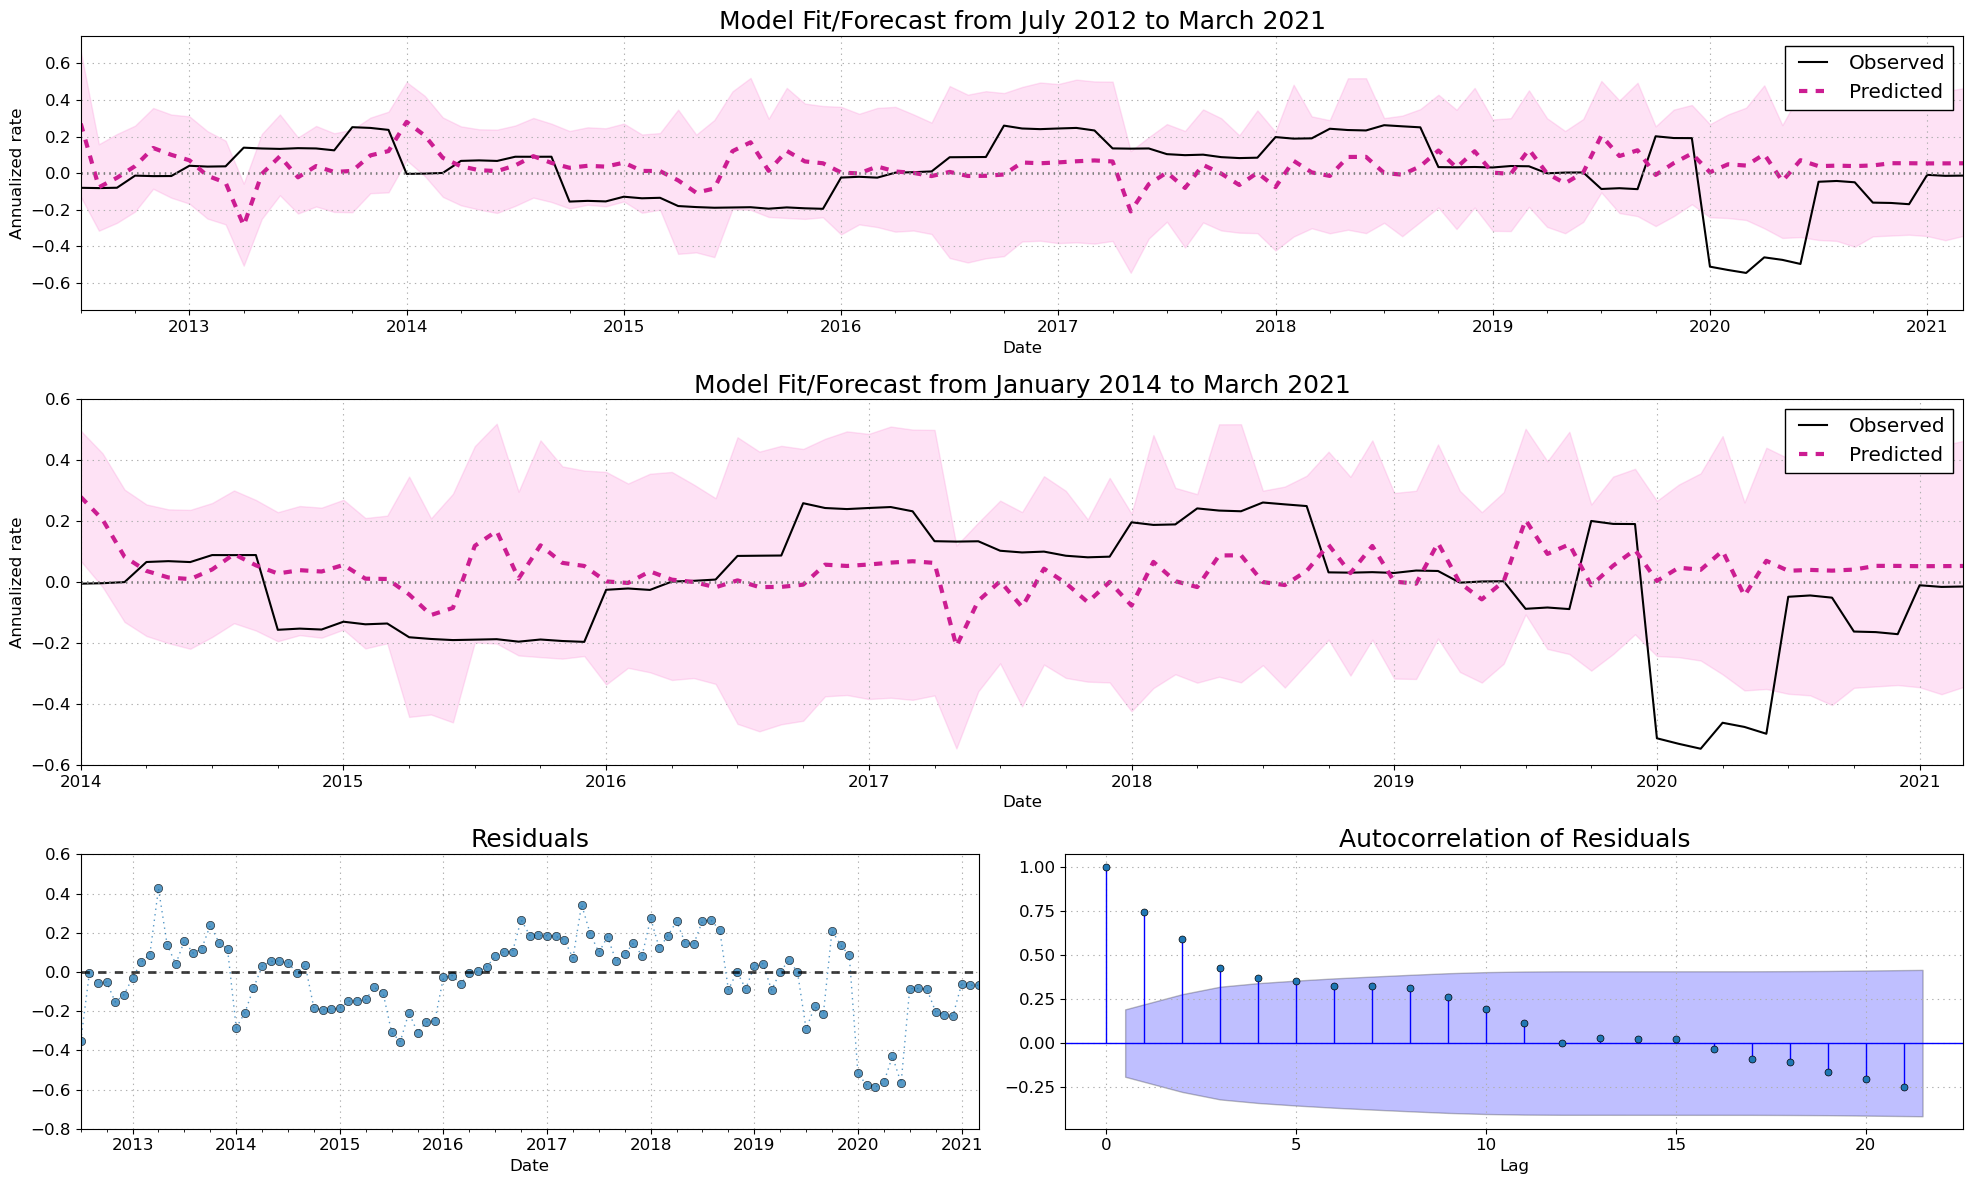

In [9]:
f = plot_forecast(data=df, y='y', yhat='yhat', ci_lower='yhat_lower', ci_upper='yhat_upper', 
                  start_date='2014')

* Index converted to datetime. Please verify example below.
from 2012-07-01 00:00:00 to 2012-07-01 00:00:00

* Dropping duplicate index values. Keeping last.

2020-05-01 00:00:00
2020-05-01 00:00:00
- from July 01, 2012 to May 01, 2020 -
mse: 0.0422
rmse: 0.2055


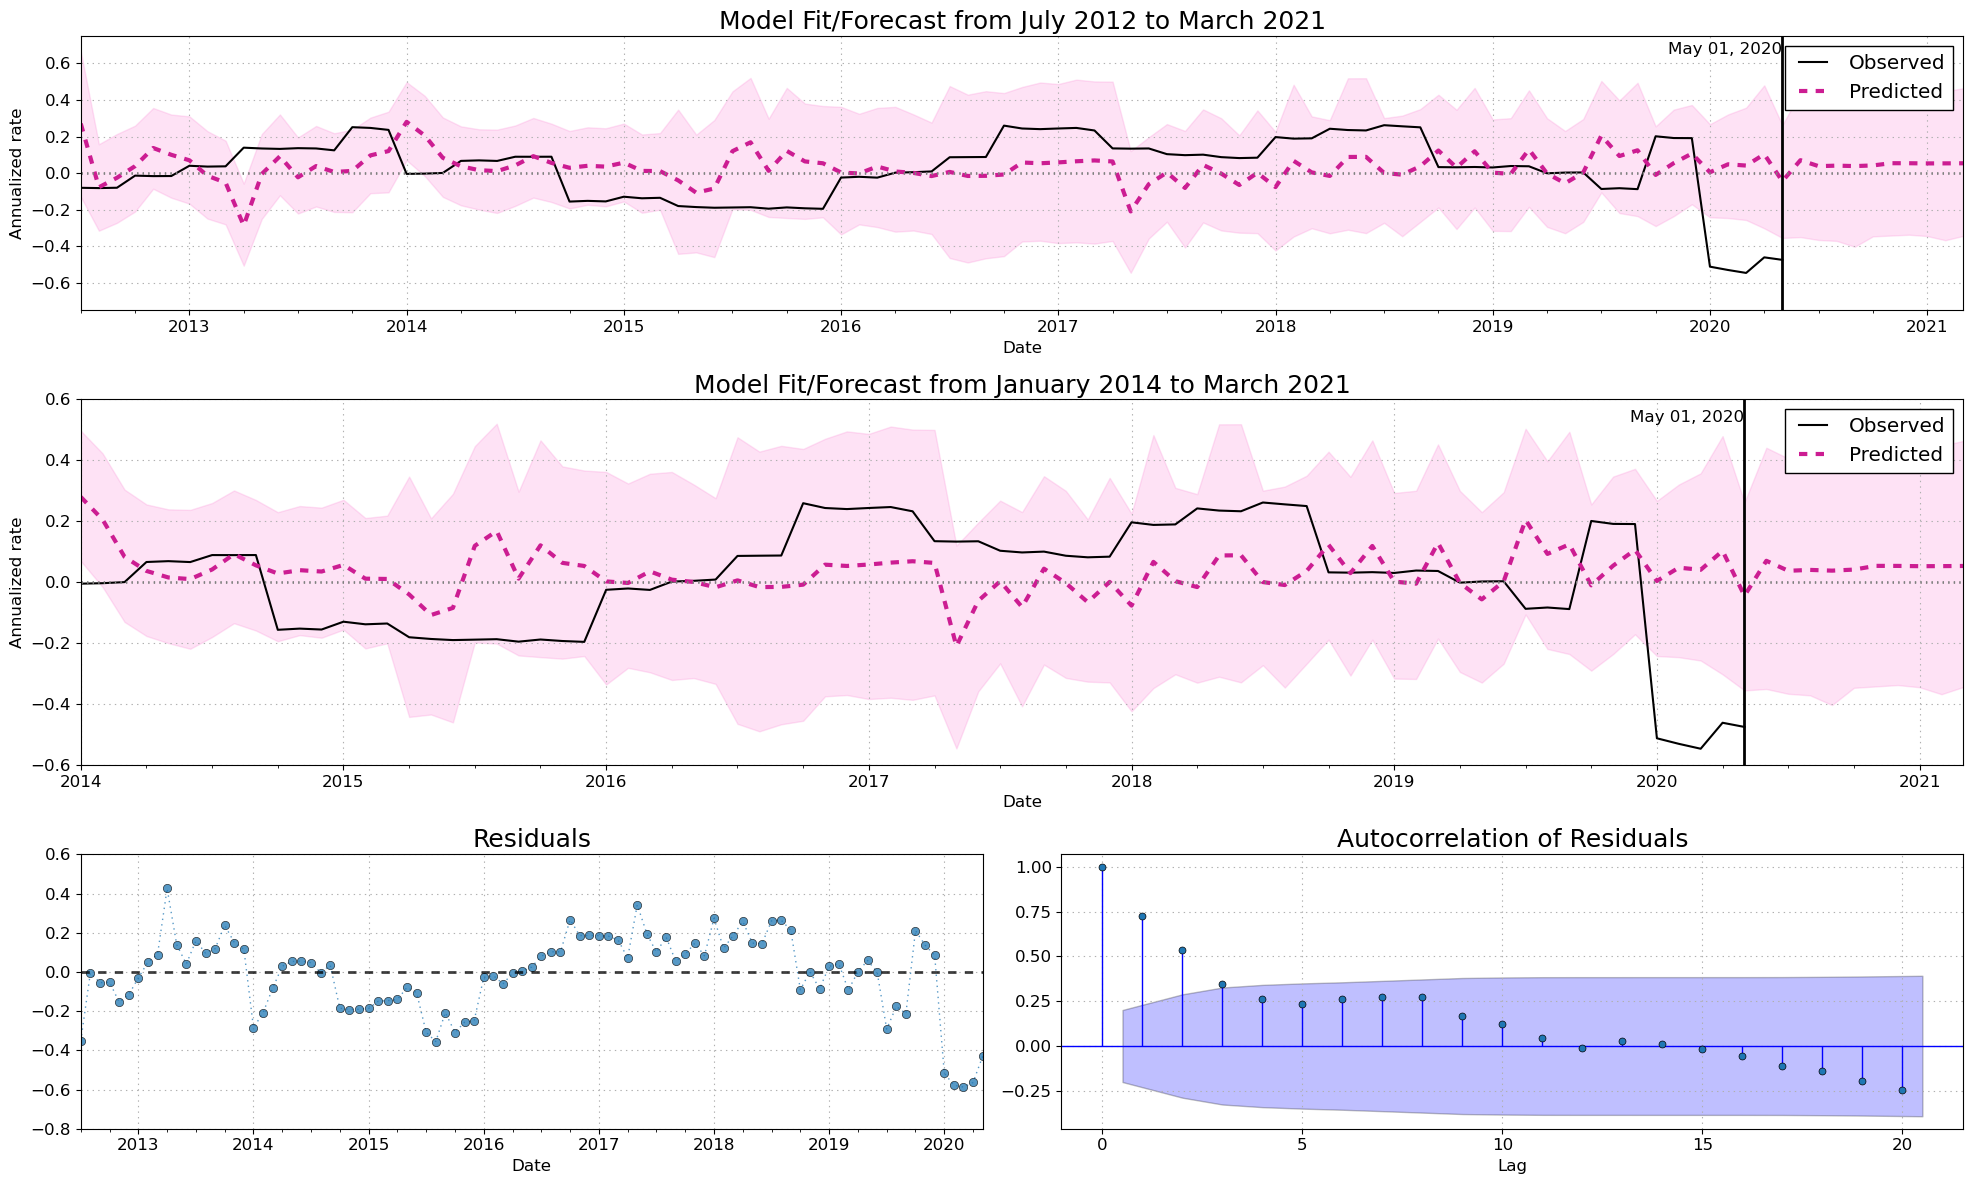

In [11]:
import numpy as np 
# Set last 30 "y" as nan
df.iloc[-30:, -2] = np.nan

f = plot_forecast(data=df, y='y', yhat='yhat', ci_lower='yhat_lower', ci_upper='yhat_upper', 
                  start_date='2014')

## Change title, label, more

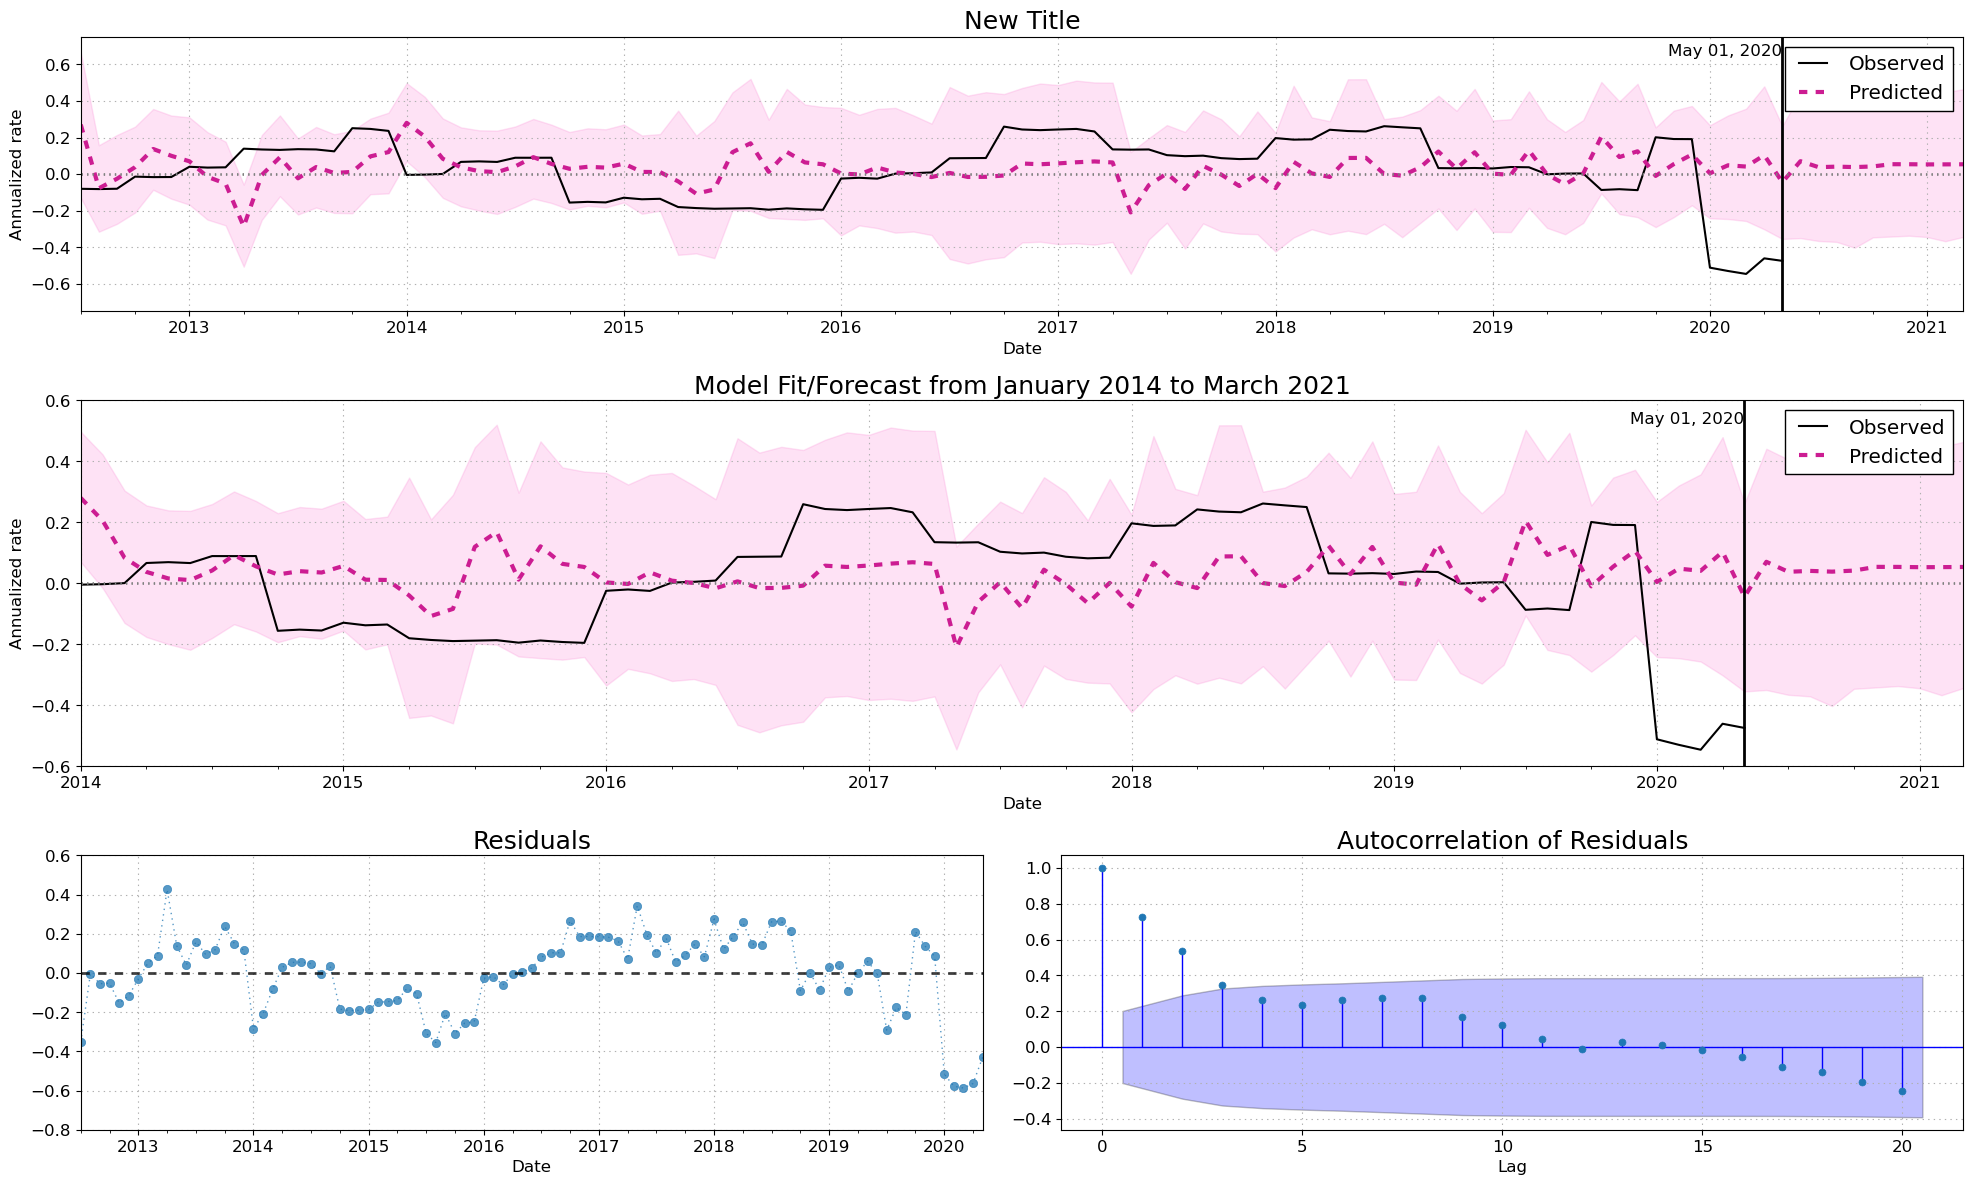

In [12]:
# This is not awesome, but it gets the job done
ax = f.get_axes()

# Set new title for first plot
ax[0].set_title('New Title', fontsize=18)
f